In [1]:
import pandas as pd
import numpy as num

In [3]:
train=pd.read_csv('SalaryData_Train(1).csv')
test=pd.read_csv('SalaryData_Test(1).csv')

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.shape

(30161, 14)

In [7]:
test.shape

(15060, 14)

In [8]:
train.pop('education')
test.pop('education')

0                 11th
1              HS-grad
2           Assoc-acdm
3         Some-college
4                 10th
             ...      
15055        Bachelors
15056        Bachelors
15057        Bachelors
15058        Bachelors
15059        Bachelors
Name: education, Length: 15060, dtype: object

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['workclass']= label_encoder.fit_transform(train['workclass'])
train['maritalstatus']= label_encoder.fit_transform(train['maritalstatus'])
train['occupation']=label_encoder.fit_transform(train['occupation'])
train['relationship']= label_encoder.fit_transform(train['relationship'])
train['race']= label_encoder.fit_transform(train['race'])
train['sex']= label_encoder.fit_transform(train['sex'])
train['native']= label_encoder.fit_transform(train['native'])
train['Salary']= label_encoder.fit_transform(train['Salary'])

In [10]:
test['workclass']= label_encoder.fit_transform(test['workclass'])
test['maritalstatus']= label_encoder.fit_transform(test['maritalstatus'])
test['occupation']=label_encoder.fit_transform(test['occupation'])
test['relationship']= label_encoder.fit_transform(test['relationship'])
test['race']= label_encoder.fit_transform(test['race'])
test['sex']= label_encoder.fit_transform(test['sex'])
test['native']= label_encoder.fit_transform(test['native'])
test['Salary']= label_encoder.fit_transform(test['Salary'])

In [11]:
train.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0
2,38,2,9,0,5,1,4,1,0,0,40,37,0
3,53,2,7,2,5,0,2,1,0,0,40,37,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0


In [12]:
test.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,2,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,6,4,7,1,4,1,0,0,30,37,0


In [13]:
train.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [14]:
test.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [15]:
cmplt=pd.concat([test,train])

In [16]:
cmplt.drop(columns=['educationno','relationship','race','sex','native'],axis=1,inplace=True)

In [17]:
cmplt

,age,workclass,maritalstatus,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,4,6,0,0,40,0
1,38,2,2,4,0,0,50,0
2,28,1,2,10,0,0,40,1
3,44,2,2,6,7688,0,40,1
4,34,2,4,7,0,0,30,0
...,...,...,...,...,...,...,...,...
30156,27,2,2,12,0,0,38,0
30157,40,2,2,6,0,0,40,1
30158,58,2,6,0,0,0,40,0
30159,22,2,4,0,0,0,20,0


In [18]:
cmplt.isnull().sum()

age              0
workclass        0
maritalstatus    0
occupation       0
capitalgain      0
capitalloss      0
hoursperweek     0
Salary           0
dtype: int64

In [20]:
!pip install autoviz

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (30161, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0

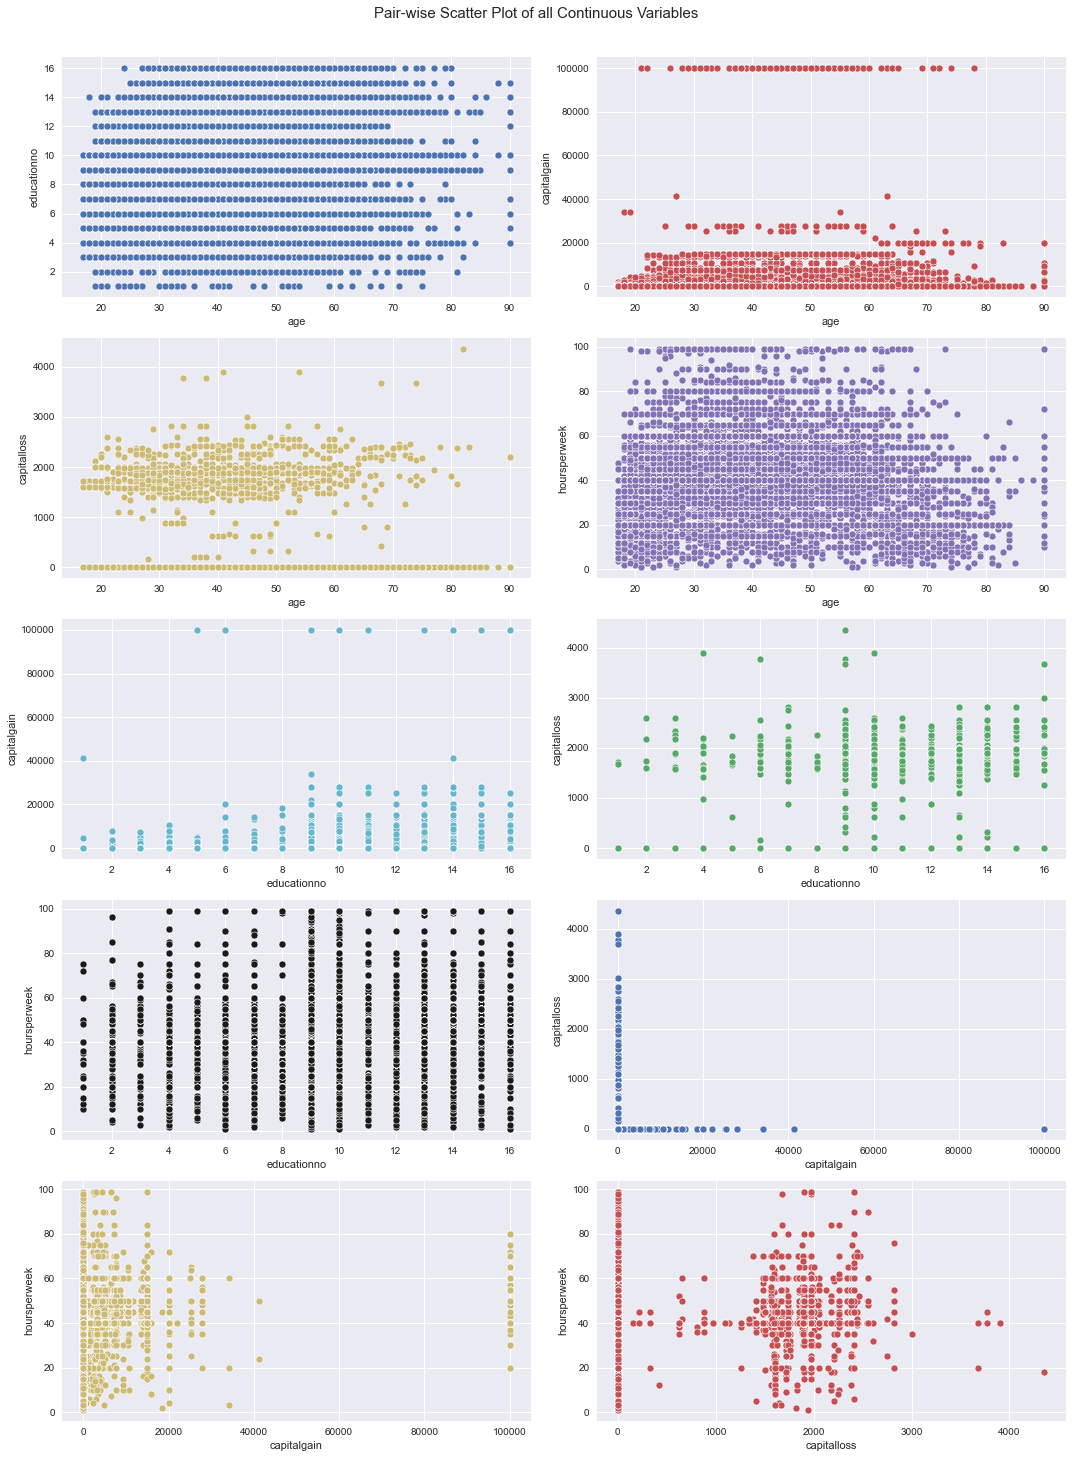

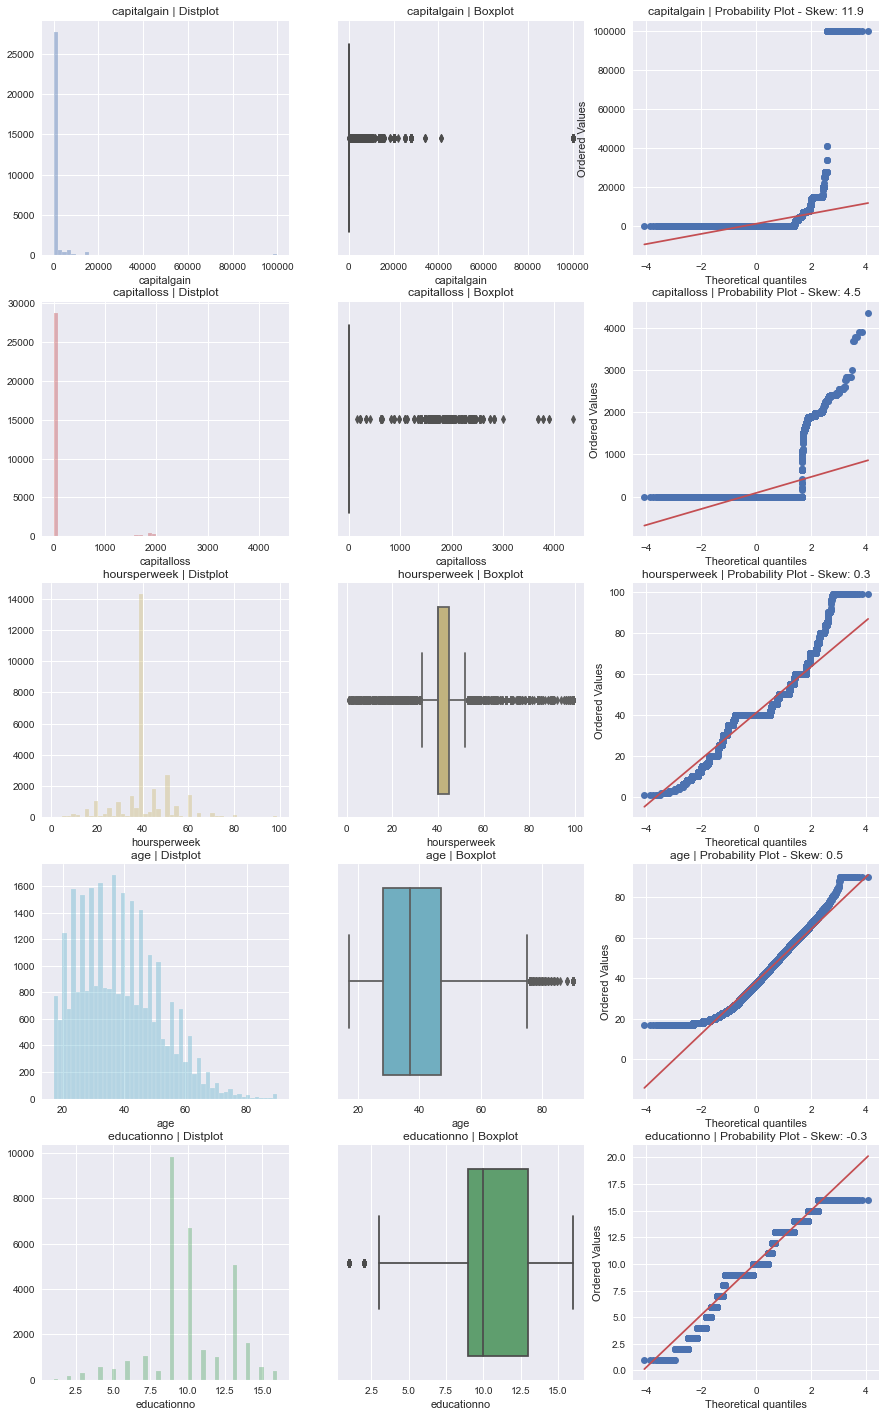

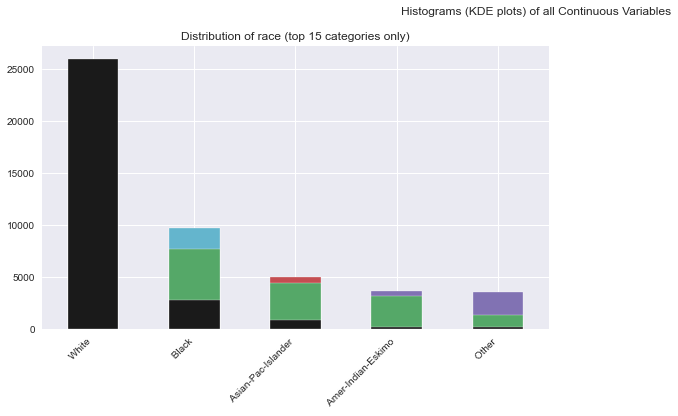

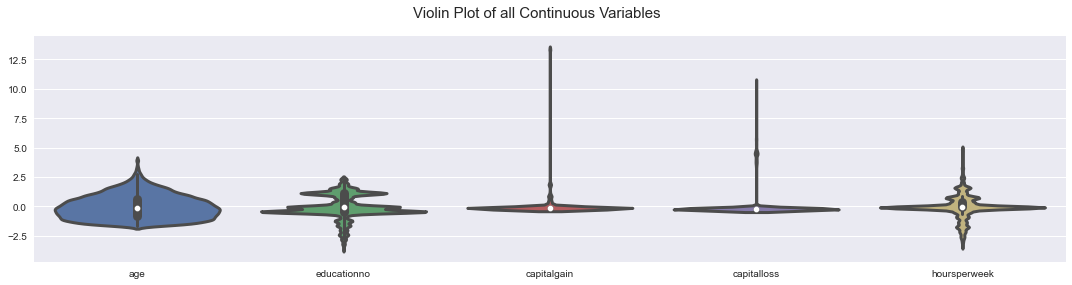

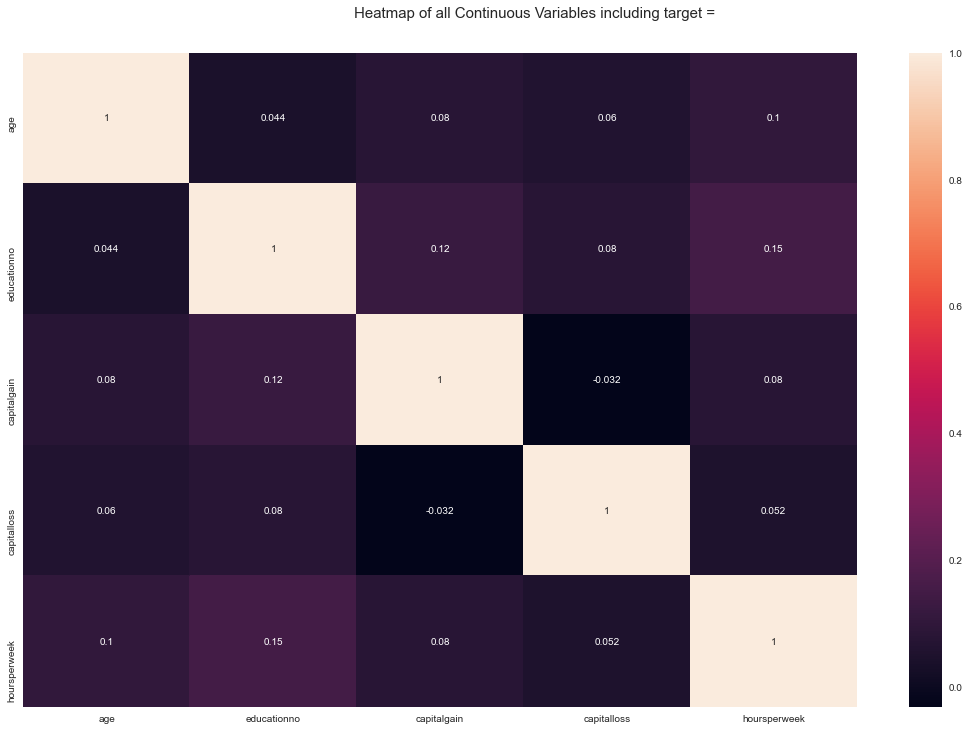

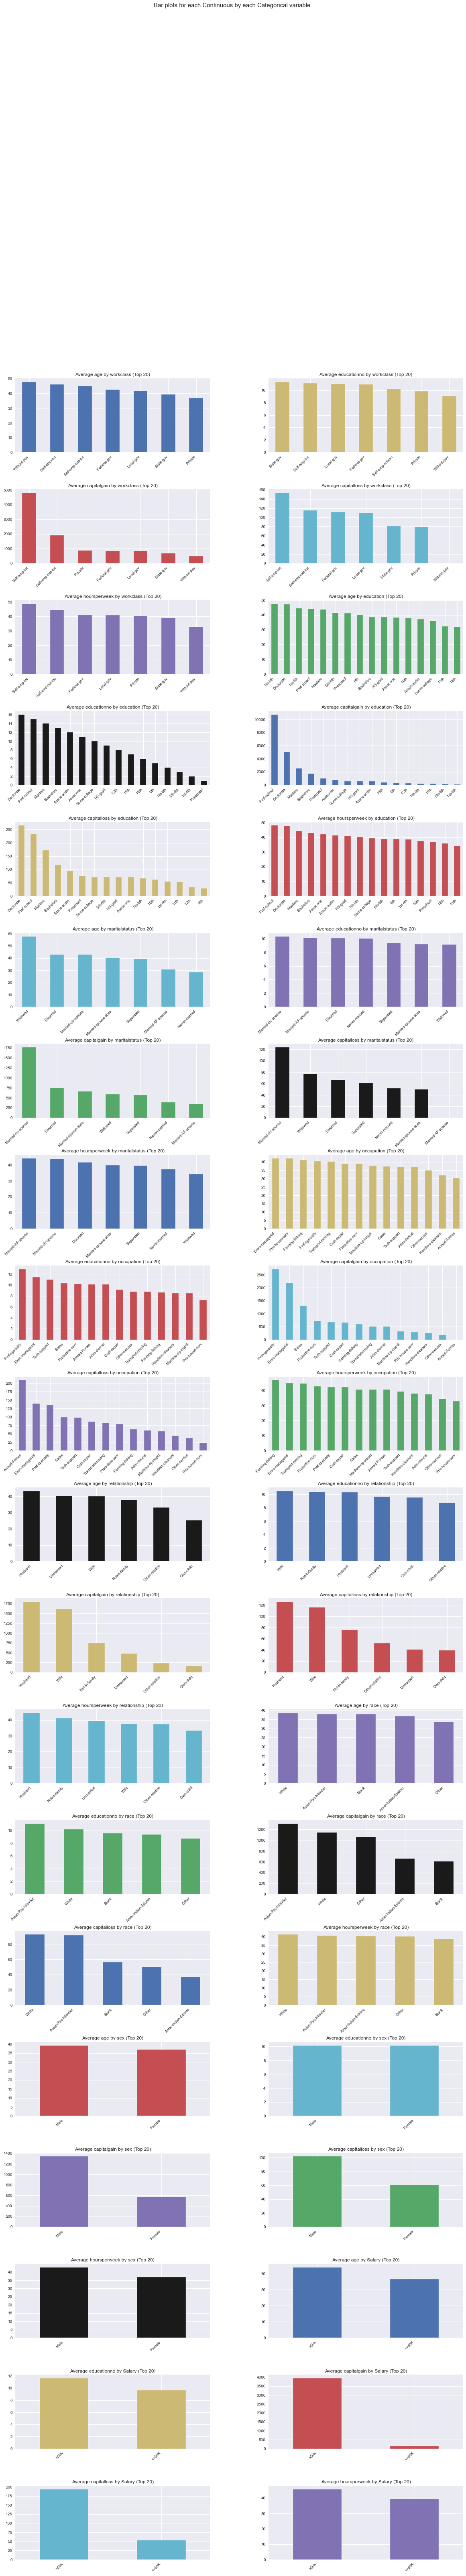

Time to run AutoViz (in seconds) = 34.109

 ###################### VISUALIZATION Completed ########################


In [21]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV=AutoViz_Class()
viz=AV.AutoViz('SalaryData_Train(1).csv')

In [22]:
x_train=cmplt.iloc[:30162,0:-1]
y_train=cmplt.iloc[:30162,-1]

In [23]:
x_test=cmplt.iloc[30162:,0:-1]
y_test=cmplt.iloc[30162:,-1]

In [24]:
y_train

0        0
1        0
2        1
3        1
4        0
        ..
15097    0
15098    0
15099    1
15100    0
15101    0
Name: Salary, Length: 30162, dtype: int32

In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((30162, 7), (30162,), (15059, 7), (15059,))

In [26]:
from sklearn import svm
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
print("SVM")

SVM


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 79.52055249352547


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11284
           1       0.75      0.27      0.40      3775

    accuracy                           0.80     15059
   macro avg       0.77      0.62      0.64     15059
weighted avg       0.79      0.80      0.76     15059



In [29]:
print(confusion_matrix(y_test,y_pred))

[[10939   345]
 [ 2739  1036]]
